There are 176 countries in this dataset


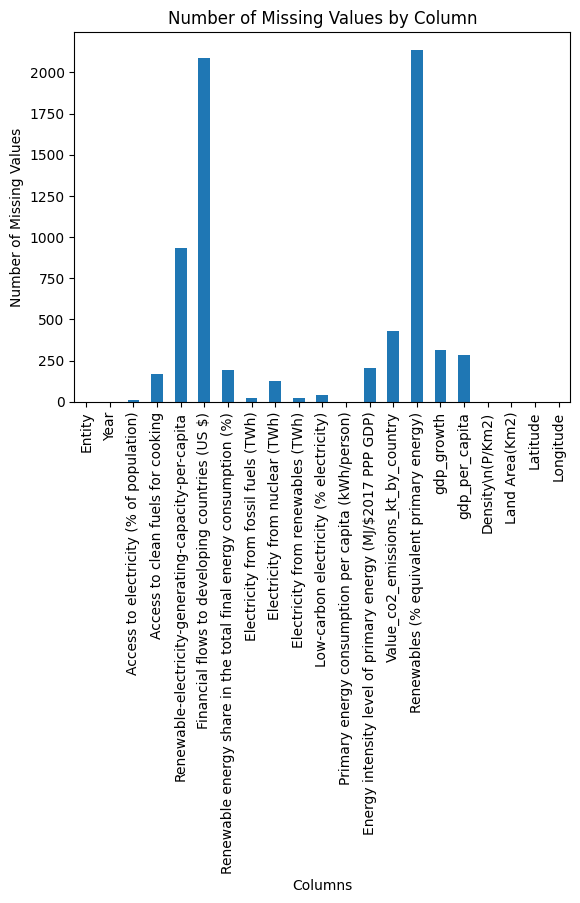

Renewables (% equivalent primary energy)                            58.563990
Financial flows to developing countries (US $)                      57.248561
Renewable-electricity-generating-capacity-per-capita                25.513839
Value_co2_emissions_kt_by_country                                   11.729241
gdp_growth                                                           8.687312
gdp_per_capita                                                       7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Renewable energy share in the total final energy consumption (%)     5.316525
Access to clean fuels for cooking                                    4.631406
Electricity from nuclear (TWh)                                       3.453001
Low-carbon electricity (% electricity)                               1.151000
Electricity from renewables (TWh)                                    0.575500
Electricity from fossil fuels (TWh)                             

In [ ]:
# Install the pycountry-convert package
!!pip install pycountry-convert

# Import required libraries for starting the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import pycountry_convert as pc

# Set default renderer for plotly
pio.renderers.default = 'colab'

# Read the dataset
df = pd.read_csv('global-data-on-sustainable-energy (1).csv')

# Check number of countries
num_countries = df.Entity.nunique()
print(f"There are {num_countries} countries in this dataset")

# Check number of missing values
missing_values = df.isna().sum()
# print(missing_values)

# Plot N/A variables
missing_values.plot(kind='bar')
plt.title('Number of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.savefig('NumberOfMissingValues.png')
plt.show()

# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]
# print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Percentage of missing values in our dataset
missing_percentage = ((df.isna().sum()) / df.shape[0]) * 100
print(missing_percentage.sort_values(ascending=False))

# Drop columns with more than 25% missing values
df.drop(['Renewables (% equivalent primary energy)', 'Financial flows to developing countries (US $)', 'Renewable-electricity-generating-capacity-per-capita'], axis=1, inplace=True)

# Check the dataframe info again
# df.info()

# Ensure all columns that should be numeric are properly converted to numeric
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        continue

# Fill remaining missing values with the mean value of that column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# # Check again percentage of missing values in our dataset
missing_percentage_after_fill = ((df.isna().sum()) / df.shape[0]) * 100
# print(missing_percentage_after_fill.sort_values(ascending=False))



      Year          Entity  gdp_per_capita
1969  2015      Luxembourg    105419.60850
414   2015         Bermuda    102005.62560
3223  2015     Switzerland     84776.14217
645   2015  Cayman Islands     76284.19393
2487  2015          Norway     74355.51586
2718  2015           Qatar     63039.11263
1612  2015         Ireland     61987.55100
3517  2015   United States     56863.37150
183   2015       Australia     56707.02208
2984  2015       Singapore     55646.61875
918   2015         Denmark     53254.85637
1528  2015         Iceland     52951.68151
3202  2015          Sweden     51545.48361
3496  2015  United Kingdom     45404.56777
2340  2015     Netherlands     45175.23189
204   2015         Austria     44178.04738
624   2015          Canada     43596.13554
1191  2015         Finland     42784.69836
1297  2015         Germany     41086.72967
351   2015         Belgium     40991.80814


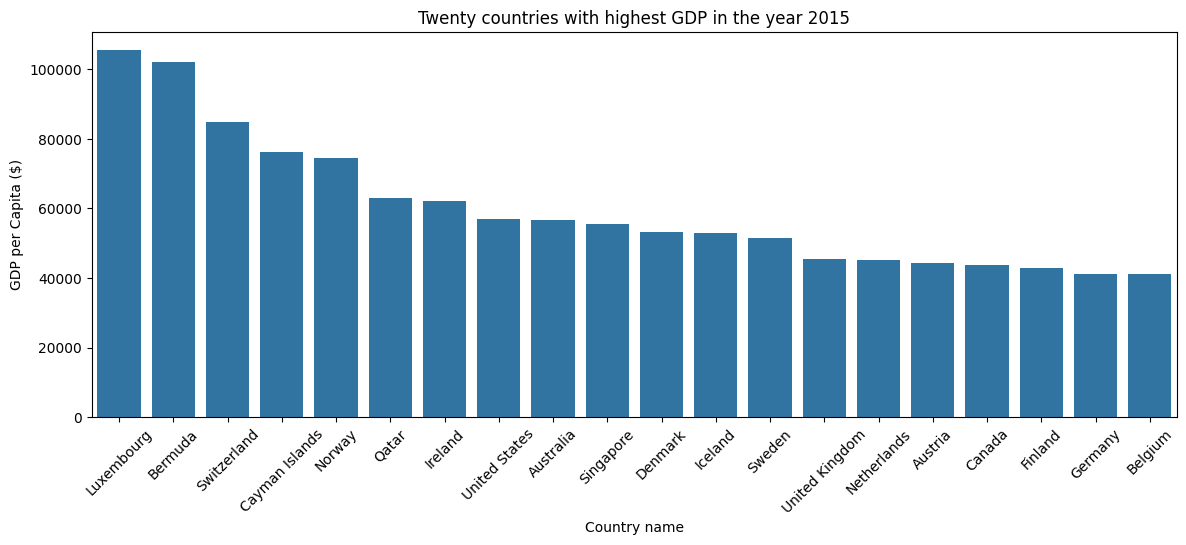

In [ ]:

# Show twenty countries with higher GDP in the year 2015
higher_gdp_countries_in_2015 = df[df['Year'] == 2015].sort_values(by='gdp_per_capita', ascending=False)[['Year', 'Entity', 'gdp_per_capita']].head(20)
print(higher_gdp_countries_in_2015)

# Plot twenty countries with highest GDP in the year 2015
plt.figure(figsize=(14, 5))
sns.barplot(x='Entity', y='gdp_per_capita', data=higher_gdp_countries_in_2015).set(
    xlabel="Country name", ylabel="GDP per Capita ($)", title='Twenty countries with highest GDP in the year 2015')
plt.xticks(rotation=45)
plt.savefig('highestGDP2015.png')
plt.show()


      Year          Entity  gdp_per_capita
1974  2020      Luxembourg    116014.60250
419   2020         Bermuda    107079.47980
3228  2020     Switzerland     87097.03645
1617  2020         Ireland     85267.76474
650   2020  Cayman Islands     85082.52686
2492  2020          Norway     67329.67779
3522  2020   United States     63593.44362
923   2020         Denmark     61063.31643
2989  2020       Singapore     59797.75218
1533  2020         Iceland     59270.18005
2345  2020     Netherlands     52397.11671
3207  2020          Sweden     52274.40879
188   2020       Australia     51692.84275
2723  2020           Qatar     50124.38594
1196  2020         Finland     48744.98813
209   2020         Austria     48586.80132
1302  2020         Germany     46208.42947
356   2020         Belgium     45159.34822
1638  2020          Israel     44168.94364
629   2020          Canada     43294.64816


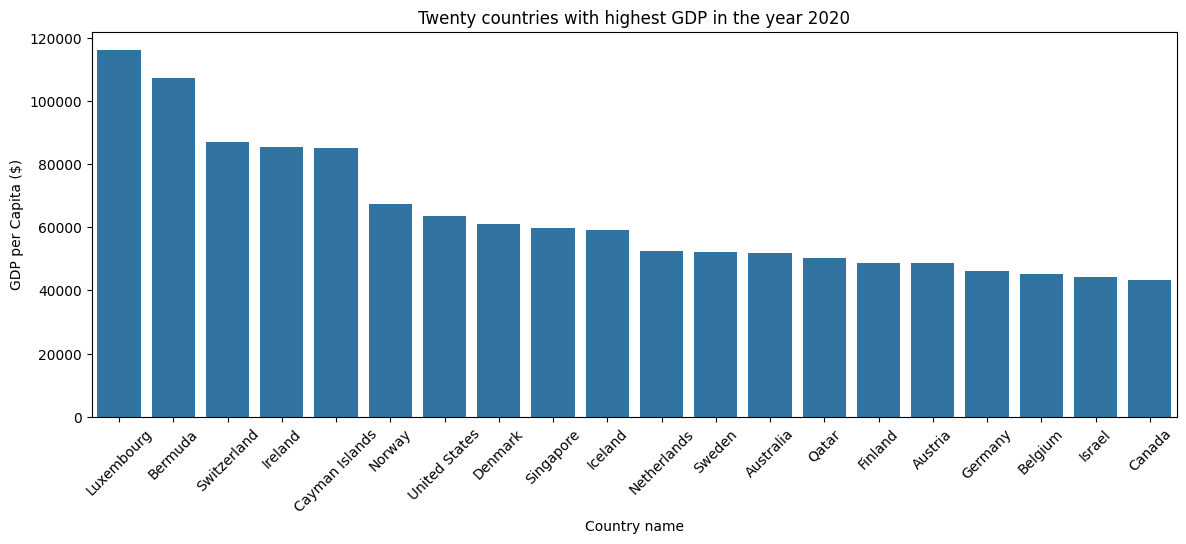

In [ ]:

# Show twenty countries with higher GDP in the year 2020
higher_gdp_countries_in_2020 = df[df['Year'] == 2020].sort_values(by='gdp_per_capita', ascending=False)[['Year', 'Entity', 'gdp_per_capita']].head(20)
print(higher_gdp_countries_in_2020)

# Plot twenty countries with highest GDP in the year 2020
plt.figure(figsize=(14, 5))
sns.barplot(x='Entity', y='gdp_per_capita', data=higher_gdp_countries_in_2020).set(
    xlabel="Country name", ylabel="GDP per Capita ($)", title='Twenty countries with highest GDP in the year 2020')
plt.xticks(rotation=45)

plt.savefig('highestGDP2020.png')
plt.show()

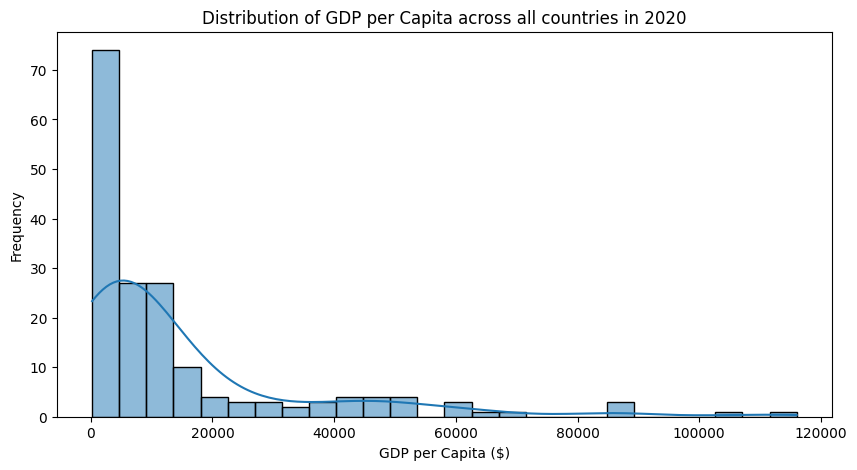

In [ ]:

# Distribution of GDP per Capita across all countries in 2010
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Year'] == 2020]['gdp_per_capita'], kde=True)
plt.title('Distribution of GDP per Capita across all countries in 2020')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Frequency')

plt.savefig('GDPperCapita.png')
plt.show()



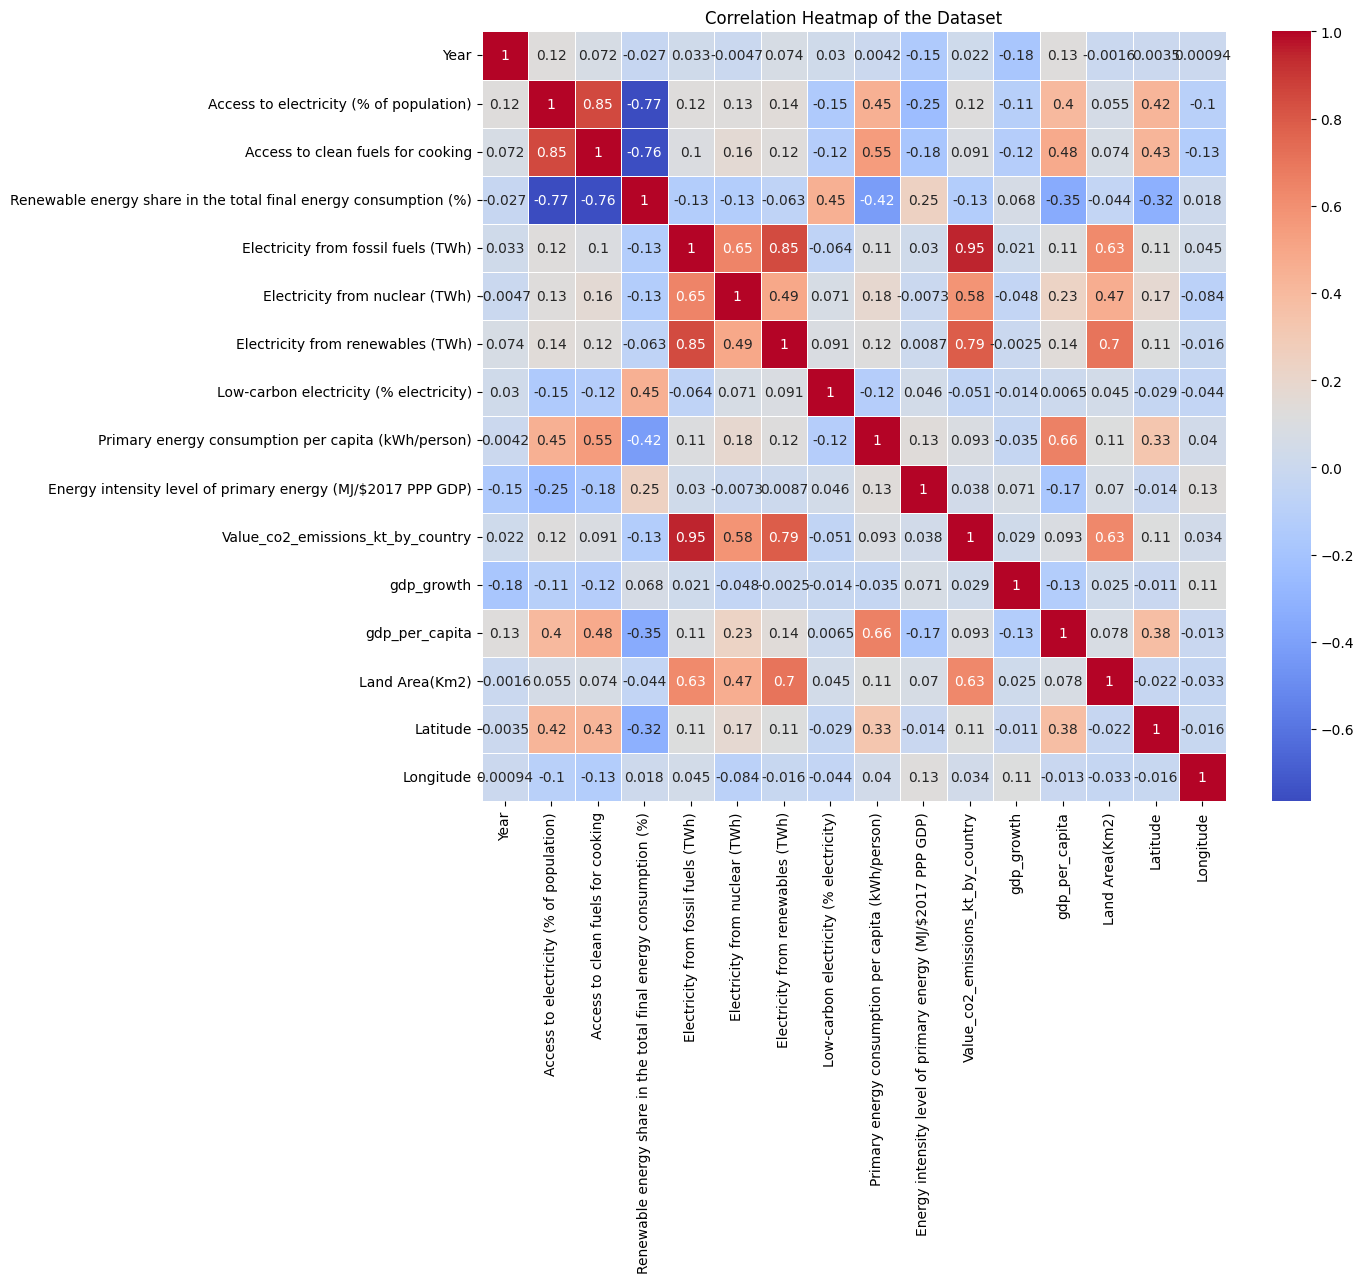

In [ ]:


# Correlation heatmap of the dataset (only numeric columns)
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of the Dataset')
plt.savefig('CorrelationHeatmap.png')
plt.show()


In [ ]:
# Import necessary libraries
import plotly.graph_objects as go
import pycountry_convert as pc

# Function to convert country names to ISO codes using pycountry_convert
def get_iso3(country_name):
    try:
        return pc.country_name_to_country_alpha3(country_name)
    except KeyError:
        return None

# Apply the function to get ISO codes
df['Country_names_ISO3'] = df['Entity'].apply(get_iso3)

# Define a function to create choropleth maps for different years
def create_choropleth_map(year):
    D_to_map = df[df.Year == year]['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']
    locations = df[df.Year == year]['Country_names_ISO3']
    names = df[df.Year == year]['Entity']

    fig = go.Figure(data=go.Choropleth(
        locations=locations,
        z=D_to_map,
        text=names,
        colorscale='Blues',
        autocolorscale=True,
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title='MJ/$2017 PPP GDP'
    ))

    fig.update_layout(
        title_text=f'Energy intensity level of primary energy in {year}',
        autosize=False,
        width=1000,
        height=500
    )
    return fig

# Create choropleth maps for the years 2015, 2017, and 2019
fig_2010 = create_choropleth_map(2010)
fig_2015 = create_choropleth_map(2015)
fig_2017 = create_choropleth_map(2017)
fig_2019 = create_choropleth_map(2019)

# Show the figures
fig_2010.show()
fig_2015.show()
fig_2017.show()
fig_2019.show()
